## Gráfico de mapas de calor 1

Para este tipo de gráfico vamos a utilizar un «dataset» que recoge las 1000 películas más valoradas en IMDB 7. Está sacado desde esta página de Kaggle y se ha descargado el fichero de datos en imdb-top-1000.csv.

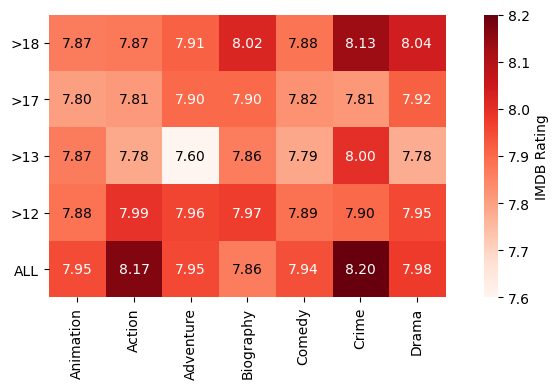

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


## Cargamos los datos quedándonos con las columnas:
#       Certificate (clasificación de la película según edades)
#       Genre (géneros de la película)
#       IMDB_Rating (valoración de la película en IMDB)
df = pd.read_csv("imdb-top-1000.csv", usecols=["Certificate", "Genre", "IMDB_Rating"])

# Creamos una nueva columna en el DataFrame donde guardaremos únicamente el género principal de cada película
df["Main_Genre"] = df["Genre"].str.split(",", expand=True)[0]

## Agrupamos y cargamos los valores medios de las valoraciones
# unstack permite disponer la agrupación en forma tabular (para el heatmap)
ratings = df.groupby(["Certificate", "Main_Genre"])["IMDB_Rating"].mean().unstack()

# Nos quedamos con un subconjunto de certificados y géneros
review_certificates = ["U", "UA", "PG-13", "R", "A"]
review_genres = [
     "Animation",
     "Action",
     "Adventure",
     "Biography",
     "Comedy",
     "Crime",
     "Drama"
]
ratings = ratings.loc[review_certificates, review_genres]

# Recodificamos los certificados (clasificación) con códigos más entendibles
certs_description = {"U": "ALL", "UA": ">12", "PG-13": ">13", "R": ">17", "A": ">18"}
ratings.index = ratings.reset_index()["Certificate"].replace(certs_description)

## Construcción del mapa de calor
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)

text_colors = ("black", "white")
im = ax.imshow(ratings, cmap="Reds")  # mapa de calor
cbar = fig.colorbar(im, ax=ax, label="IMDB Rating")  # leyenda
cbar.outline.set_visible(False)

x = ratings.columns
y = ratings.index

# Mostrar las etiquetas. El color del texto cambia en función de su normalización
for i in range(len(y)):
    for j in range(len(x)):
        value = ratings.iloc[i, j]
        text_color = text_colors[int(im.norm(value) > 0.5)]  # color etiqueta
        ax.text(
            j, i, f"{value:.2f}", color=text_color, va="center", ha="center"
        )

# Formateo de los ejes
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=90)
ax.set_yticks(range(len(y)))
ax.set_yticklabels(y)
ax.invert_yaxis()

ax.spines[:].set_visible(False)

fig.tight_layout()

## Gráfico de mapas de calor 2
Partiendo del fichero euro-dollar-clean.csv que contiene información sobre el cambio euro-dollar durante los últimos 12 años, cree el siguiente mapa de calor en el que se analiza la evolución del cambio enfrentando meses y años:

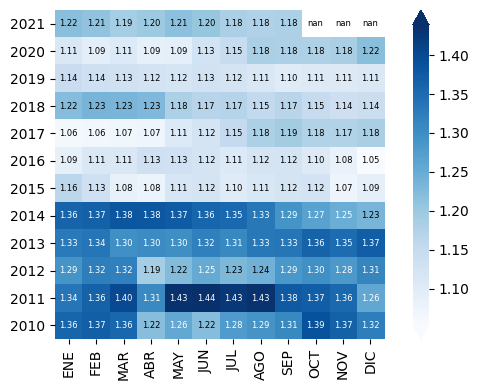

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./datos/euro-dollar-clean.csv")
eurodollar = df.groupby(["year", "month"])["dollar"].mean().unstack()

fig, ax = plt.subplots(figsize=(6, 4), dpi=100)

text_colors = ("black", "white")
im = ax.imshow(eurodollar, cmap="Blues")
cbar = fig.colorbar(im, ax=ax, extend="both")
cbar.outline.set_visible(False)

x = eurodollar.columns
y = eurodollar.index

# Mostrar las etiquetas. El color del texto cambia en función de su normalización
for i in range(len(y)):
    for j in range(len(x)):
        value = eurodollar.iloc[i, j]
        text_color = text_colors[int(im.norm(value) > 0.5)]  # color etiqueta
        ax.text(j, i, f"{value:.2f}", color=text_color, va="center", ha="center", size=6)

# Formateo de los ejes
ax.set_xticks(range(len(x)))
ax.set_xticklabels(
    [
        "ENE",
        "FEB",
        "MAR",
        "ABR",
        "MAY",
        "JUN",
        "JUL",
        "AGO",
        "SEP",
        "OCT",
        "NOV",
        "DIC"
    ],
    rotation=90,
)
ax.set_yticks(range(len(y)))
ax.set_yticklabels(y)
ax.invert_yaxis()

ax.spines[:].set_visible(False)

fig.tight_layout()